In [1]:
## Missing Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
falsy_values = (0, False, None, '', [], {})

#For Python, all the values above are considered "falsy":

In [4]:
any(falsy_values)

False

In [5]:
all(falsy_values)

False

In [18]:
## np.nan is like a virus. If you have any nan value in an array and you try to perform an operation on it, 
## you'll get unexpected results:
np.nan

nan

In [7]:
3 + np.nan

nan

In [8]:
a = np.array([1,2,3,4, np.nan])

In [9]:
a

array([ 1.,  2.,  3.,  4., nan])

In [10]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [11]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [12]:
a.sum()

nan

In [13]:
a.mean()

nan

In [14]:
3 + None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [15]:
a  = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [16]:
a.sum()

nan

In [17]:
a.mean()

nan

In [19]:
## Numpy also supports an "Infinite" type:

np.inf

##Which also behaves as a virus:


inf

In [20]:
5 + np.inf

inf

In [21]:
np.inf/10

inf

In [23]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=float)

In [24]:
b.sum()

nan

In [25]:
np.isnan(np.nan)

True

In [26]:
np.isinf(np.inf)

True

In [27]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

In [28]:


np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))



array([False, False, False,  True, False, False])

In [29]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [30]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

In [31]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [33]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

In [34]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [35]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [36]:
a[np.isfinite(a)].sum()

10.0

In [37]:
a[np.isfinite(a)].mean()

2.5

In [38]:
## Handling missing data with Pandas

In [39]:
pd.isnull(np.nan)

True

In [40]:
pd.isna(np.nan)

True

In [41]:
pd.isna(None)

True

In [42]:
pd.isnull(None)

True

In [44]:
pd.notnull(np.nan)

False

In [45]:
pd.notna(np.nan)

False

In [46]:
pd.notnull(3)

True

In [47]:
pd.notna(5)

True

In [48]:
pd.isnull(pd.Series([1,2,np.nan,5]))

0    False
1    False
2     True
3    False
dtype: bool

In [51]:
pd.notnull(pd.DataFrame({
    "Column1": [1,2,3,np.nan],
    "Column2": [np.nan, 34.5,65.6,103.67]
}))

,Column1,Column2
0,True,False
1,True,True
2,True,True
3,False,True


In [53]:
a = pd.Series([1,2,3,4,np.nan])

In [54]:
a.count()

4

In [55]:
a.sum()

10.0

In [56]:
a.mean()

2.5

In [57]:
a

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [58]:
pd.notnull(a)

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [59]:
pd.notnull(a).count()

5

In [60]:
pd.isnull(a).count()

5

In [62]:
pd.isnull(a).sum()

1

In [63]:
pd.notnull(a).sum()

4

In [64]:
a

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [65]:
a[a.notnull()]

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [66]:
a

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [67]:
a.dropna()

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [68]:
a

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [69]:
B = pd.DataFrame({
    "Column1": [1,2,3,np.nan],
    "Column2": [np.nan, 34.5,65.6,103.67]
})

In [70]:
B

,Column1,Column2
0,1.0,NaN
1,2.0,34.50
2,3.0,65.60
3,NaN,103.67


In [72]:
B.isnull().count()

Column1    4
Column2    4
dtype: int64

In [73]:
B.isnull().sum()

Column1    1
Column2    1
dtype: int64

In [76]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  3 non-null      float64
 1   Column2  3 non-null      float64
dtypes: float64(2)
memory usage: 196.0 bytes


In [78]:
B.dropna()
## This will output rows which doesnt have any NaNs.

,Column1,Column2
1,2.0,34.5
2,3.0,65.6


In [80]:
B.dropna(axis = 1)

## Since both the columns have a NaN. It cant output any column!

""
0
1
2
3


In [81]:
## We can  control this extreme behavior of .dropna() method by adding some attributes. 

B.dropna(how = 'all')

,Column1,Column2
0,1.0,NaN
1,2.0,34.50
2,3.0,65.60
3,NaN,103.67


In [82]:
B.dropna(how = "any")

,Column1,Column2
1,2.0,34.5
2,3.0,65.6


In [86]:
B.dropna(thresh = 1)

,Column1,Column2
0,1.0,NaN
1,2.0,34.50
2,3.0,65.60
3,NaN,103.67


In [99]:
C = pd.DataFrame ({
    "C1":[1,np.nan,3,4,np.nan,13,23],
    "C2":["a","b",np.nan,"abc","qw","g","j"],
    "C3":[np.nan,12,23,np.nan,67,54,87]
})

In [100]:
C

,C1,C2,C3
0,1.0,a,NaN
1,NaN,b,12.0
2,3.0,NaN,23.0
3,4.0,abc,NaN
4,NaN,qw,67.0
5,13.0,g,54.0
6,23.0,j,87.0


In [101]:
C.dropna(thresh = 3)

,C1,C2,C3
5,13.0,g,54.0
6,23.0,j,87.0


In [102]:
C

,C1,C2,C3
0,1.0,a,NaN
1,NaN,b,12.0
2,3.0,NaN,23.0
3,4.0,abc,NaN
4,NaN,qw,67.0
5,13.0,g,54.0
6,23.0,j,87.0


In [104]:
C.fillna(0)

,C1,C2,C3
0,1.0,a,0.0
1,0.0,b,12.0
2,3.0,0,23.0
3,4.0,abc,0.0
4,0.0,qw,67.0
5,13.0,g,54.0
6,23.0,j,87.0


In [105]:
C

,C1,C2,C3
0,1.0,a,NaN
1,NaN,b,12.0
2,3.0,NaN,23.0
3,4.0,abc,NaN
4,NaN,qw,67.0
5,13.0,g,54.0
6,23.0,j,87.0


In [106]:
C.fillna(C.mean())

TypeError: can only concatenate str (not "int") to str

In [108]:
B

,Column1,Column2
0,1.0,NaN
1,2.0,34.50
2,3.0,65.60
3,NaN,103.67


In [109]:
B.fillna(B.mean())

,Column1,Column2
0,1.0,67.923333
1,2.0,34.500000
2,3.0,65.600000
3,2.0,103.670000


In [110]:
B

,Column1,Column2
0,1.0,NaN
1,2.0,34.50
2,3.0,65.60
3,NaN,103.67


In [113]:
## there's a method argument within .fillna() method

B.fillna(method = 'ffill')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5884\2465303393.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  B.fillna(method = 'ffill')


,Column1,Column2
0,1.0,NaN
1,2.0,34.50
2,3.0,65.60
3,3.0,103.67


In [114]:
B.ffill()

,Column1,Column2
0,1.0,NaN
1,2.0,34.50
2,3.0,65.60
3,3.0,103.67


In [115]:
B.bfill()

,Column1,Column2
0,1.0,34.50
1,2.0,34.50
2,3.0,65.60
3,NaN,103.67


In [116]:
C

,C1,C2,C3
0,1.0,a,NaN
1,NaN,b,12.0
2,3.0,NaN,23.0
3,4.0,abc,NaN
4,NaN,qw,67.0
5,13.0,g,54.0
6,23.0,j,87.0


In [117]:
C.ffill()

,C1,C2,C3
0,1.0,a,NaN
1,1.0,b,12.0
2,3.0,b,23.0
3,4.0,abc,23.0
4,4.0,qw,67.0
5,13.0,g,54.0
6,23.0,j,87.0


In [118]:
C.bfill()

,C1,C2,C3
0,1.0,a,12.0
1,3.0,b,12.0
2,3.0,abc,23.0
3,4.0,abc,67.0
4,13.0,qw,67.0
5,13.0,g,54.0
6,23.0,j,87.0


In [119]:
B.dropna()

,Column1,Column2
1,2.0,34.5
2,3.0,65.6


In [120]:
len(B) == len(B.dropna())

False

In [121]:
## Now we will discuss data cleaning of non-null values!

In [122]:
df = pd.DataFrame ({
    "Sex": ["M","F","F","D","?"],
    "Age": [29, 30,24,290,25]
})

In [123]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [124]:
df["Sex"]

0    M
1    F
2    F
3    D
4    ?
Name: Sex, dtype: object

In [125]:
df["Sex"].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [126]:
df["Sex"].value_counts()

Sex
F    2
M    1
D    1
?    1
Name: count, dtype: int64

In [128]:
df["Sex"].replace("D","F")

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [129]:
df["Sex"].replace("?","M")

0    M
1    F
2    F
3    D
4    M
Name: Sex, dtype: object

In [130]:
df["Sex"].replace({"D":"F", "N":"M", "?":"M"})

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object

In [131]:
# or you can directly apply to the dataframe level. 

df.replace({
    "Sex": {"D":"M", "?":"F"},
    "Age": {290: 29}
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,M,29
4,F,25


In [132]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [133]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [134]:
df = pd.DataFrame ({
    "Sex": ["M","F","F","D","?","M","F"],
    "Age": [29, 30,24,290,25,120,560]
})

In [135]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25
5,M,120
6,F,560


In [142]:
df.loc[df["Age"]>100, "Age"] = df.loc[df["Age"]>100, "Age"]/10

In [143]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,29
4,?,25
5,M,12
6,F,56


In [145]:
## Now we will discuss about Duplicate data and how we will navigate through them. 

ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [146]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [148]:
ambassadors.duplicated()

# this method will identify the elements after the 1st occurance as duplicates. 

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [149]:
ambassadors.duplicated(keep ="last")

# the keep attribute will change the above behavior and now will assign not duplicate only for the last occurance. 

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [151]:
ambassadors.duplicated(keep = False)

# This attribute will assign True value for all duplicate data for every instance of it.

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [152]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [153]:
ambassadors.drop_duplicates(keep = "last")

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [155]:
ambassadors.drop_duplicates(keep = True)

ValueError: keep must be either "first", "last" or False

In [156]:
ambassadors.drop_duplicates(keep = False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

In [157]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [158]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [159]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [160]:
players.duplicated(subset = ['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [162]:
players.duplicated(subset = ["Name"], keep = "last")

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [164]:
players.duplicated(subset = ["Name"], keep = False)

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [161]:
players.drop_duplicates(subset = ["Name"], keep ="last")

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [165]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [166]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    5 non-null      object
dtypes: object(1)
memory usage: 172.0+ bytes


In [169]:
df["Data"].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [179]:
df = df["Data"].str.split("_",expand = True)

KeyError: 'Data'

In [180]:
df.columns = ["Year", "Sex", "Country", "No. of Children"]

In [181]:
df

,Year,Sex,Country,No. of Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [189]:
df['Year'].str.contains('\?')

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5884\681321257.py:1: SyntaxWarning: invalid escape sequence '\?'
  df['Year'].str.contains('\?')


0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [190]:
df["Country"].str.contains("U")

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [191]:
df["Country"].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [192]:
df["Country"].str.replace(" ", "")

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [193]:
df

,Year,Sex,Country,No. of Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [194]:
## NOw we will learn about Data Visualization!

In [196]:
import matplotlib.pyplot as plt

In [198]:
x = np.arange(-10,11)

In [202]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

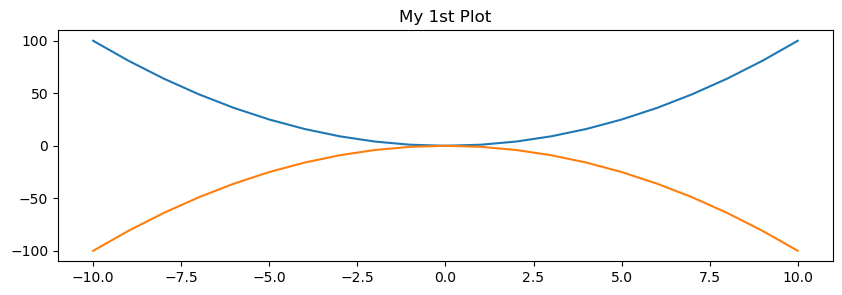

In [203]:
plt.figure(figsize = (10,3))

plt.title("My 1st Plot")

plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

Text(0, 0.5, 'X Squared')

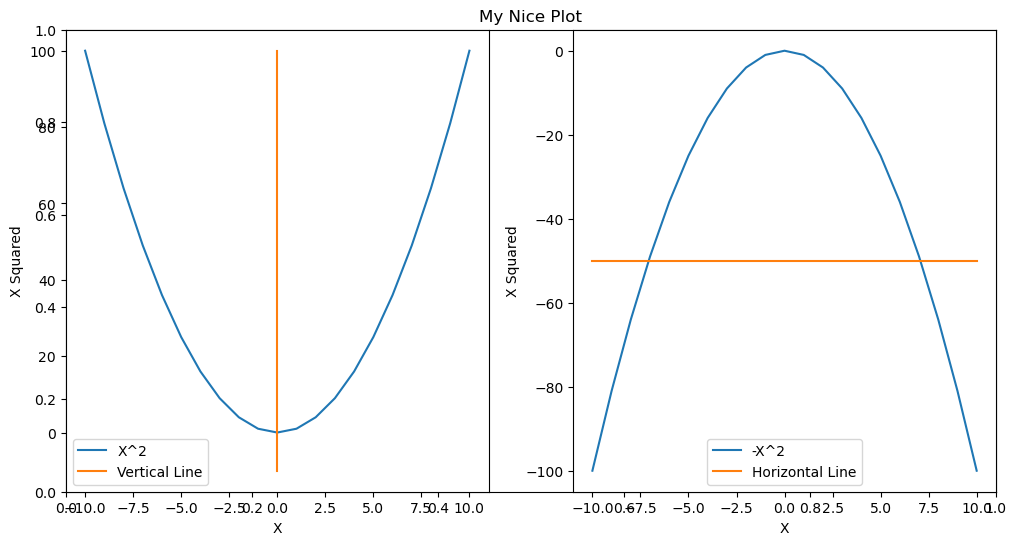

In [204]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')